# Lale User Study - March 2021 - Lale treatment

The goal of this study is to examine different dimensions of usability of machine learning (ML) pipelines. We will provide a number of sample pipelines and ask you to analyze and manipulate them during 4 tasks:
1. Understanding the pipeline
1. Refinement
1. Debugging
1. Refinement with Search

Before we start, we load a dataset and print a few rows to see what it looks like.

In [1]:
#load forest covertype data, downsample for faster experiments
import pandas as pd
from lale.datasets import covtype_df
from sklearn.model_selection import train_test_split
from lale.lib.lale import categorical

train_X = pd.read_pickle("train_x.pickle")
test_X = pd.read_pickle("test_x.pickle")
train_y = pd.read_pickle("train_y.pickle")
test_y = pd.read_pickle("test_y.pickle")

pd.options.display.max_columns = 10
pd.concat([train_y, train_X], axis=1)

/Users/jtsay/.pyenv/versions/3.7.9/lib/python3.7/site-packages/pyparsing.py:3190: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)


,target,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,...,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
290090,3,2475.0,102.0,12.0,134.0,...,0.0,0.0,0.0,0.0,0.0
7182,1,3182.0,49.0,5.0,633.0,...,0.0,0.0,0.0,0.0,0.0
19521,6,1948.0,58.0,29.0,228.0,...,0.0,0.0,0.0,0.0,0.0
558581,1,3313.0,327.0,5.0,127.0,...,0.0,0.0,1.0,0.0,0.0
5333,2,3201.0,152.0,16.0,764.0,...,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
520157,2,3073.0,294.0,9.0,256.0,...,0.0,0.0,0.0,0.0,0.0
92586,1,2694.0,225.0,4.0,60.0,...,0.0,0.0,0.0,0.0,0.0
298700,1,3292.0,113.0,18.0,67.0,...,0.0,0.0,1.0,0.0,0.0
561595,2,2926.0,141.0,10.0,150.0,...,0.0,0.0,0.0,0.0,0.0


## Step 1. Understand a Pipeline

Consider the following Lale pipeline:

In [2]:
from lale.lib.sklearn import Normalizer
from lale.lib.sklearn import SelectKBest
from lale.lib.sklearn import KNeighborsClassifier
from lale.lib.lale import Project
from lale.lib.lale import categorical
from lale.lib.lale import ConcatFeatures

In [3]:
prepA = Project(drop_columns=categorical(max_values=2)) >> Normalizer()
prepB = Project(columns=categorical(max_values=2)) >> SelectKBest(k=8)
pipeline1 = (prepA & prepB) >> ConcatFeatures >> KNeighborsClassifier()

In [4]:
from sklearn.metrics import accuracy_score
trained1 = pipeline1.fit(train_X, train_y)
print(f"accuracy {accuracy_score(test_y, trained1.predict(test_X)):.1%}")

accuracy 64.8%


Handy documentation links:
- [Lale API](https://lale.readthedocs.io/en/latest/)
- [scikit-learn API](https://scikit-learn.org/stable/modules/classes.html)

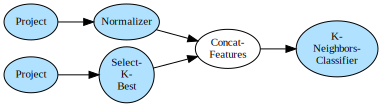

In [4]:
# if you'd like to try things out, put your code here
pipeline1.visualize()

**Please answer the following questions.**

- Q1a: What is the final classifier in the pipeline?
- Q1b: Where does the input for the final classifier come from?
- Q1c: Which columns are subjected to feature selection?

## 2. Refine without Search

Create a `pipeline2` that is similar to `pipeline1` from Question 1, except
that instead of Normalizer, it uses a StandardScaler, and
instead of KNeighborsClassifier, it uses a DecisionTreeClassifier with
a maximum depth of 3. Handy documentation links:
- [Lale API](https://lale.readthedocs.io/en/latest/)
  - [Lale StandardScaler](https://lale.readthedocs.io/en/latest/modules/lale.lib.sklearn.standard_scaler.html)
  - [Lale DecisionTreeClassifier](https://lale.readthedocs.io/en/latest/modules/lale.lib.sklearn.decision_tree_classifier.html)
- [scikit-learn API](https://scikit-learn.org/stable/modules/classes.html)
  - [sklearn StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
  - [sklearn DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

### Answer for Step 2.

In [5]:
# pipeline1 reproduced below:
prepA = Project(drop_columns=categorical(max_values=2)) >> Normalizer()
prepB = Project(columns=categorical(max_values=2)) >> SelectKBest(k=8)
pipeline1 = (prepA & prepB) >> ConcatFeatures >> KNeighborsClassifier()

# your code here

### Questions about Step 2.

- Q2a. What documentation did you find the most helpful?
- Q2b. Did your new pipeline work the first time? If not, what went wrong?
- Q2c. What gotchas did you encounter, if any?

## Step 3. Error Messages

Look at the error message from the following code:

In [6]:
from lale.lib.sklearn import LinearSVC
pipeline3 = SelectKBest(k=15) >> LinearSVC(penalty="l1", loss="hinge")

ValidationError: Invalid configuration for LinearSVC(penalty='l1', loss='hinge') due to constraint the combination of penalty=`l1` and loss=`hinge` is not supported.
Schema of constraint 1: {
    "description": "The combination of penalty=`l1` and loss=`hinge` is not supported",
    "anyOf": [
        {"type": "object", "properties": {"penalty": {"enum": ["l2"]}}},
        {
            "type": "object",
            "properties": {"loss": {"enum": ["squared_hinge"]}},
        },
    ],
}
Value: {'penalty': 'l1', 'loss': 'hinge', 'dual': True, 'tol': 0.0001, 'C': 1.0, 'multi_class': 'ovr', 'fit_intercept': True, 'intercept_scaling': 1.0, 'class_weight': None, 'verbose': 0, 'random_state': None, 'max_iter': 1000}

In [7]:
trained3 = pipeline3.fit(train_X, train_y)
pred_y = trained3.predict(test_X)

NameError: name 'pipeline3' is not defined

Make a small change to the pipeline to avoid that error.

Handy documentation links:
- [Lale docs for LinearSVC](https://lale.readthedocs.io/en/latest/modules/lale.lib.sklearn.linear_svc.html)
- [sklearn docs for LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html),

### Answer for Step 3.

In [ ]:
# Please fix the reproduced pipeline in the cells below:

from lale.lib.sklearn import LinearSVC
pipeline3 = SelectKBest(k=15) >> LinearSVC(penalty="l1", loss="hinge")

In [ ]:
trained3 = pipeline3.fit(train_X, train_y)
pred_y = trained3.predict(test_X)

### Questions about Step 3.

- Q3a. What caused the error?
- Q3b. Which documentation if any did you find useful for diagnosing the error?
- Q3c. What parts of the error message if any did you find useful?
- Q3d. How do you normally debug machine learning pipelines?

## Step 4. Refine with Search

Experiment with a search space of variants of `pipeline1` (from Question 1):

- normalizers: Normalizer, StandardScaler, or neither
- classifiers: LogisticRegression, ExtraTreesClassifier,
  KNeighborsClassifier, or DecisionTreeClassifier

Find the pipeline variant with the best predictive performance. You do not need to consider ensembles.

Handy documentation links:
- [Lale API](https://lale.readthedocs.io/en/latest/)
- [scikit-learn API](https://scikit-learn.org/stable/modules/classes.html)

### Answer for Step 4.

In [10]:
from lale.lib.sklearn import StandardScaler
from lale.lib.sklearn import LogisticRegression, ExtraTreesClassifier, DecisionTreeClassifier

# pipeline1 reproduced below:
prepA = Project(drop_columns=categorical(max_values=2)) >> Normalizer()
prepB = Project(columns=categorical(max_values=2)) >> SelectKBest(k=8)
pipeline1 = (prepA & prepB) >> ConcatFeatures >> KNeighborsClassifier()

trained1 = pipeline1.fit(train_X, train_y)
print(f"accuracy {accuracy_score(test_y, trained1.predict(test_X)):.1%}")

# your code here

accuracy 64.8%


### Questions about Step 4.

- Q4a. Which pipeline variant lead to the highest accuracy?
- Q4b. What was the accuracy of that pipeline variant?
- Q4c. Did your new pipeline work the first time? If not, what went wrong?
- Q4d. What gotchas did you encounter, if any?
- Q4e. How do you normally search across pipeline variants?